## Assignment 1: Ridge Regression and the Lasso in Python

This assignment on Ridge Regression and the Lasso is a Python adaptation of p. 251 - 255 of "Introduction to Statistical Learning with Application in R". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

hitters = pd.read_csv("Hitters.csv", index_col=0).dropna()
#hitters = hitters.drop(hitters.columns[0], axis=1)

In [2]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


### 1 Preprocessing Data

In [3]:
hitters_num = hitters._get_numeric_data()
Y = hitters_num["Salary"]
X = hitters_num.drop(["Salary"], axis=1)
#X_norm = preprocessing.normalize(X)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 16 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
dtypes: int64(16)
memory usage: 34.9+ KB


### 2 Lasso

In [27]:
alphas = 10**np.linspace(15,-3,100)*0.5
alphas

array([5.00000000e+14, 3.28966612e+14, 2.16438064e+14, 1.42401793e+14,
       9.36908711e+13, 6.16423370e+13, 4.05565415e+13, 2.66834962e+13,
       1.75559587e+13, 1.15506485e+13, 7.59955541e+12, 5.00000000e+12,
       3.28966612e+12, 2.16438064e+12, 1.42401793e+12, 9.36908711e+11,
       6.16423370e+11, 4.05565415e+11, 2.66834962e+11, 1.75559587e+11,
       1.15506485e+11, 7.59955541e+10, 5.00000000e+10, 3.28966612e+10,
       2.16438064e+10, 1.42401793e+10, 9.36908711e+09, 6.16423370e+09,
       4.05565415e+09, 2.66834962e+09, 1.75559587e+09, 1.15506485e+09,
       7.59955541e+08, 5.00000000e+08, 3.28966612e+08, 2.16438064e+08,
       1.42401793e+08, 9.36908711e+07, 6.16423370e+07, 4.05565415e+07,
       2.66834962e+07, 1.75559587e+07, 1.15506485e+07, 7.59955541e+06,
       5.00000000e+06, 3.28966612e+06, 2.16438064e+06, 1.42401793e+06,
       9.36908711e+05, 6.16423370e+05, 4.05565415e+05, 2.66834962e+05,
       1.75559587e+05, 1.15506485e+05, 7.59955541e+04, 5.00000000e+04,
      

The remainning redictors are: ['AtBat', 'CAtBat', 'PutOuts']


Text(0,0.5,'weights')

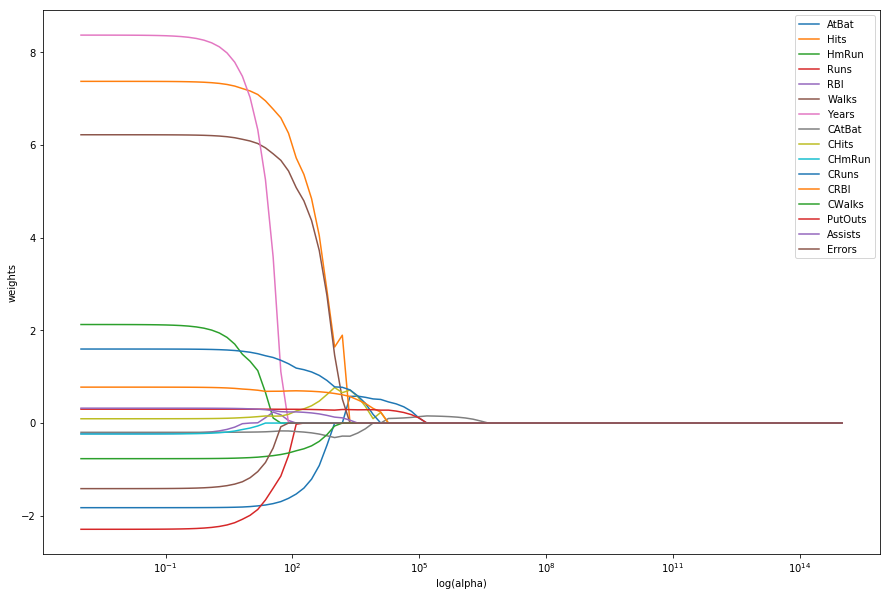

In [28]:
lasso = Lasso(max_iter=100000, normalize=True, fit_intercept=False)
coefs = []
res=0
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    if sum(lasso.coef_ != 0)==3 and not res:
        res=1
        print("The remainning pedictors are:", list(X.columns[[i for i, x in enumerate(lasso.coef_) if x!=0]]))
    coefs.append(lasso.coef_)

plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  #reverse axis
plt.axis('tight')
plt.legend(X.columns, loc="upper right")
plt.xlabel('log(alpha)')
plt.ylabel('coefficients')

From the plot above we observe that the final three predictors that remain in the model are: Hits, CRuns, and CRBI.

Notice that in the coefficient plot that depending on the choice of tuning parameter, some of the coefficients are exactly equal to zero. We now perform 10-fold cross validation to choose the best alpha, refit the model and compute the associated test error:

In [18]:
lassocv = LassoCV(cv=10, random_state=42).fit(X, Y)
lasso.set_params(alpha=lassocv.alpha_, fit_intercept=False)
print('The optimal regularization penality is:', lassocv.alpha_)
print("The total number of predictors that remain in the model with optimal regularization penalty is:", sum(lasso.fit(X, Y).coef_!=0))
print('The remaining parameters in the optimal model are:', list(X.columns[abs(lassocv.coef_)>0]))

The optimal regularization penality is: 540.6556677332911
The total number of predictors that remain in the model with optimal regularization penalty is: 9
The remaining parameters in the optimal model are: ['Hits', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists']


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [19]:
pd.Series(lasso.coef_, index=X.columns)

AtBat     -0.000000
Hits       1.700289
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      1.272808
Years      0.000000
CAtBat    -0.310050
CHits      0.758097
CHmRun     0.000000
CRuns      0.765887
CRBI       0.632717
CWalks    -0.036993
PutOuts    0.281133
Assists    0.125183
Errors    -0.000000
dtype: float64

### 3 Ridge Regression

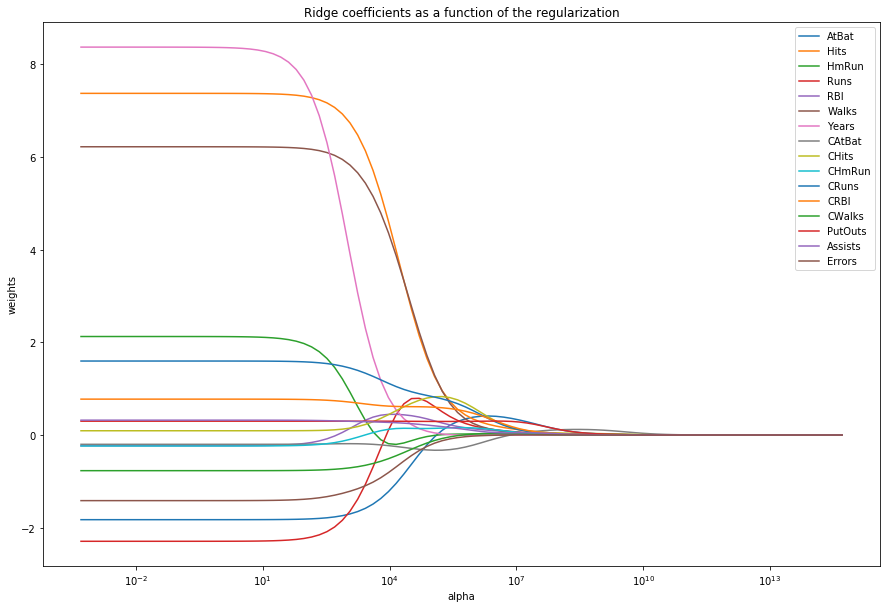

In [29]:
ridge = Ridge(fit_intercept=False, normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X,Y)
    coefs.append(ridge.coef_)
    
#np.shape(coefs)
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.legend(X.columns, loc="upper right")
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [31]:
ridgecv = RidgeCV(cv=10).fit(X, Y)
print('The optimal regularization penality is:', ridgecv.alpha_)

The optimal regularization penality is: 10.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We now see the improvement over the test MSE, so we refit our ridge regression model on the full data se t, using the value of alpha chosen by cross-validation, and examine the coeffient estimates.

In [32]:
pd.Series(ridgecv.coef_, index=X.columns)

AtBat     -2.201602
Hits       7.819879
HmRun      2.147757
Runs      -2.090791
RBI       -0.018373
Walks      6.146752
Years     -2.550092
CAtBat    -0.176631
CHits      0.071329
CHmRun    -0.230494
CRuns      1.608884
CRBI       0.800470
CWalks    -0.793378
PutOuts    0.294592
Assists    0.383888
Errors    -2.874144
dtype: float64

### 4 Short Answer - Explain bias-variance tradeoff.

First of all, read this post to better understand bias, variance, and their tradeoff: http://scott.fortmann-roe.com/docs/BiasVariance.html

The bias-variance tradeoff describes the problem of overfitting and underfitting models. We can think of bias as a quantification of how well a model can fit a training data set. We can think of variance (in this context) as describing how much a model-fit might change upon being trained on new data points. Thus, variance is a quantification of how well a model can generalize to unseen data. Techniques which are more flexible tend to yields models with low bias yet high variance. Conversely, techniques which are less flexible tend to yield models with high bias and low variance.

In the case of regularized regression techniques, we use the regularization penalty to explicitly tune the model flexibility described above. With a large penalty parameter, our models becomes less flexible and incur high bias (though likely, low variance). With a small penatly parameter, our model remains flexible, but may have a tendecy to overfit. With reference to the LASSO trajectory plot above, a model with low pentalty (large log(Lambda)) will yield large magnitude coefficients, as the model is flexible enough to fit the training data very well (low bias). This would correspond to the left-most parts of the trajectory plots. As we increase the amount of penalty, the magnitudes of all coefficients tend to shrink down, making the model less flexible. The model naturally incurs some increases biad in this regime. At the extreme end, we have a very large penalty such that all the feature coefficients go to zero and the model is completely unable to fit the data (very high bias)